In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from mpl_toolkits.mplot3d import Axes3D
import uproot # uproot examples: https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf

In [3]:
# based on https://stackoverflow.com/questions/43384448/modifying-viridis-colormap-replacing-some-colors-in-matplotlib
from matplotlib import colors

cmap_blue = plt.cm.Blues
cmaplist_blue = [cmap_blue(i) for i in range(cmap_blue.N)]
cmap_blue = colors.LinearSegmentedColormap.from_list('mcm',cmaplist_blue[int(len(cmaplist_blue)*1/4):], cmap_blue.N)

cmap_red = plt.cm.Reds
cmaplist_red = [cmap_red(i) for i in range(cmap_red.N)]
cmap_red = colors.LinearSegmentedColormap.from_list('mcm',cmaplist_red[int(len(cmaplist_red)*1/4):], cmap_red.N)

In [4]:
def GetCut(tree):
    cut = np.where((tree['passed_xy_thresh'].array() == True) \
               & (tree['passed_z_thresh'].array() == True) \
               & (tree['n_x_ch_abovenoise'].array() > 0) \
               & (tree['n_y_ch_abovenoise'].array() > 0) \
               & (tree['m_nOPCal'].array() < (1.077*tree['m_nQ'].array()+313)) \
               & (tree['m_nOPCal'].array() > (0.597*tree['m_nQ'].array()-216)) \
               & (tree['standoff'].array() > 0) \
               & (tree['energy'].array() > 2435) \
               & (tree['energy'].array() < 2481) \
               & (tree['NESTBugFound'].array() == False) \
               & (tree['NearAnodeBugFound'].array() == False) \
              )
    return cut         

In [5]:
def density_estimation(m1, m2):
    X, Y = np.mgrid[np.min(m1):np.max(m1):100j, np.min(m2):np.max(m2):100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

In [6]:
File = "/p/vast1/nexo/data/merged-v10b/Baseline2019_%s_%s.root"

In [7]:
bb0n = uproot.open(File % ('bb0n', 'FullLXe'))['tree']
bb0n_cut = GetCut(bb0n)

In [8]:
th232 = uproot.open(File % ('Th232', 'TPCVessel'))['tree']
th232_cut = GetCut(th232)

In [9]:
u238 = uproot.open(File % ('U238', 'TPCVessel'))['tree']
u238_cut = GetCut(u238)

In [10]:
m1 = th232['m_DNNvalue'].array()[th232_cut]
m2 = th232['standoff'].array()[th232_cut]

In [11]:
m3 = bb0n['m_DNNvalue'].array()[bb0n_cut][::100]
m4 = bb0n['standoff'].array()[bb0n_cut][::100]

In [12]:
m5 = u238['m_DNNvalue'].array()[u238_cut]
m6 = u238['standoff'].array()[u238_cut]

In [13]:
X,Y,Z = density_estimation(m1,m2)

In [14]:
X2,Y2,Z2 = density_estimation(m3,m4)

In [15]:
X3,Y3,Z3 = density_estimation(m5,m6)

In [16]:
# fig, ax = plt.subplots(figsize=(8, 6))
# plt.scatter(m3,m4, label='bb0n', color='blue', s=0.001)
# plt.scatter(m1,m2, label='Th232', color='red', s=0.001)
# plt.xlabel('DNN Value')
# plt.ylabel('Standoff [mm]')
# plt.xlim(0,1)
# plt.ylim(0,600)
# plt.legend(loc='upper left')
# plt.savefig('scatter_th232_bb0n_dnn_standoff.png', dpi=300, bbox_inches='tight')
# plt.close()

In [17]:
# fig, ax = plt.subplots(figsize=(8, 6))
# plt.scatter(m3,m4, label='bb0n', color='blue', s=0.001)
# plt.scatter(m5,m6, label='U238', color='red', s=0.01)
# plt.xlabel('DNN Value')
# plt.ylabel('Standoff [mm]')
# plt.xlim(0,1)
# plt.ylim(0,600)
# plt.legend(loc='upper left')
# plt.savefig('scatter_u238_bb0n_dnn_standoff.png', dpi=300, bbox_inches='tight')
# plt.close()

In [18]:
binning = 1
binning = {}

binning['version 0'] = {}
binning['version 0']['xbins'] = np.linspace(0,1.0,6)
binning['version 0']['ybins'] = np.linspace(0,650,25)
    
binning['version 1'] = {}
binning['version 1']['xbins'] = np.linspace(0,0.8,5)
binning['version 1']['xbins'] = np.append(binning['version 1']['xbins'][:-1], np.linspace(0.8,1.0,11))
binning['version 1']['ybins'] = np.linspace(0,100,11)
binning['version 1']['ybins'] = np.append(binning['version 1']['ybins'][:-1], np.linspace(100,200,6))
binning['version 1']['ybins'] = np.append(binning['version 1']['ybins'][:-1], np.linspace(200,600,9))
    
binning['version 2'] = {}
binning['version 2']['xbins'] = np.linspace(0,0.8,5)
binning['version 2']['xbins'] = np.append(binning['version 2']['xbins'][:-1], np.linspace(0.8,1.0,6))
binning['version 2']['ybins'] = np.linspace(0,130,14)
binning['version 2']['ybins'] = np.append(binning['version 2']['ybins'][:-1], np.linspace(120,150,1))
binning['version 2']['ybins'] = np.append(binning['version 2']['ybins'][:-1], np.linspace(150,600,10))
    
binning['version 3'] = {}
binning['version 3']['xbins'] = np.arange(0,1,0.02)
binning['version 3']['ybins'] = np.linspace(0,100,11)
binning['version 3']['ybins'] = np.append(binning['version 3']['ybins'][:-1], np.linspace(100,200,6))
binning['version 3']['ybins'] = np.append(binning['version 3']['ybins'][:-1], np.linspace(200,600,9))
    
binning['version 4'] = {}
binning['version 4']['xbins'] = np.linspace(0,0.8,5)
binning['version 4']['xbins'] = np.append(binning['version 4']['xbins'][:-1], np.arange(0.8,0.981,0.02))
binning['version 4']['xbins'] = np.append(binning['version 4']['xbins'][:-1], np.arange(0.98,1.01,0.01))
binning['version 4']['ybins'] = np.linspace(0,100,11)
binning['version 4']['ybins'] = np.append(binning['version 4']['ybins'][:-1], np.linspace(100,200,6))
binning['version 4']['ybins'] = np.append(binning['version 4']['ybins'][:-1], np.linspace(200,600,9))
    
binning['version 5'] = {}
binning['version 5']['xbins'] = np.linspace(0,0.8,5)
binning['version 5']['xbins'] = np.append(binning['version 5']['xbins'][:-1], np.linspace(0.8,1.0,11))
binning['version 5']['ybins'] = np.linspace(0,650,66)
    
binning['version 6'] = {}
binning['version 6']['xbins'] = np.linspace(0,0.8,5)
binning['version 6']['xbins'] = np.append(binning['version 6']['xbins'][:-1], np.linspace(0.8,1.0,11))
binning['version 6']['ybins'] = np.linspace(0,600,31)

for key in binning.keys(): 
    print(key)
    print(binning[key]['xbins'])
    print(binning[key]['ybins'])

version 0
[0.  0.2 0.4 0.6 0.8 1. ]
[  0.          27.08333333  54.16666667  81.25       108.33333333
 135.41666667 162.5        189.58333333 216.66666667 243.75
 270.83333333 297.91666667 325.         352.08333333 379.16666667
 406.25       433.33333333 460.41666667 487.5        514.58333333
 541.66666667 568.75       595.83333333 622.91666667 650.        ]
version 1
[0.   0.2  0.4  0.6  0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98
 1.  ]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 120. 140. 160.
 180. 200. 250. 300. 350. 400. 450. 500. 550. 600.]
version 2
[0.   0.2  0.4  0.6  0.8  0.84 0.88 0.92 0.96 1.  ]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 150.
 200. 250. 300. 350. 400. 450. 500. 550. 600.]
version 3
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92

version 0
version 1
version 2
version 3
version 4
version 5
version 6


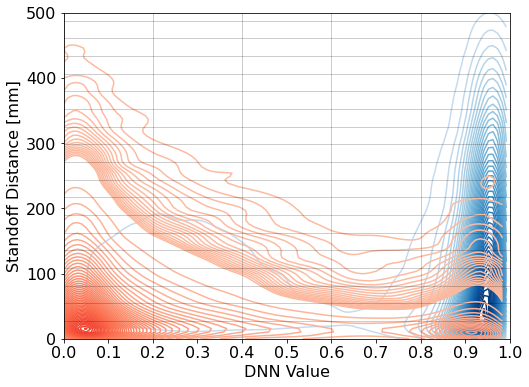

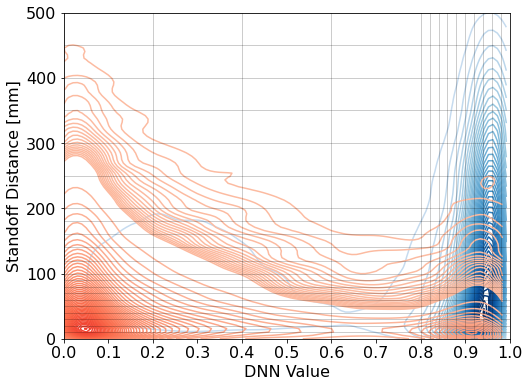

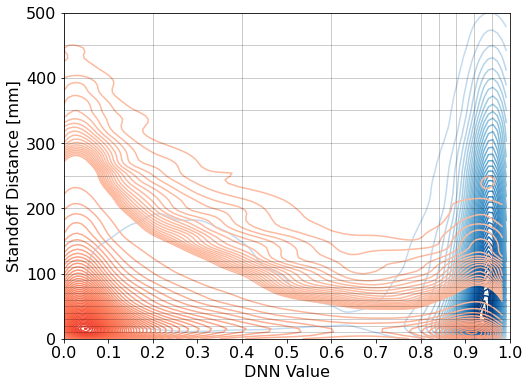

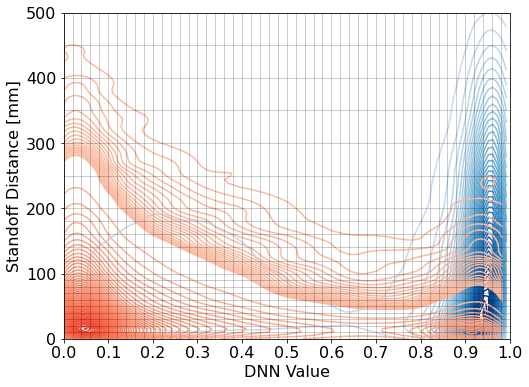

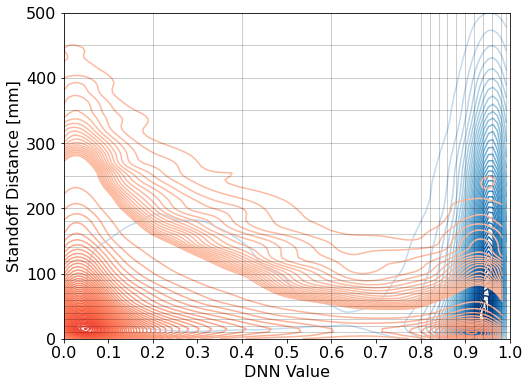

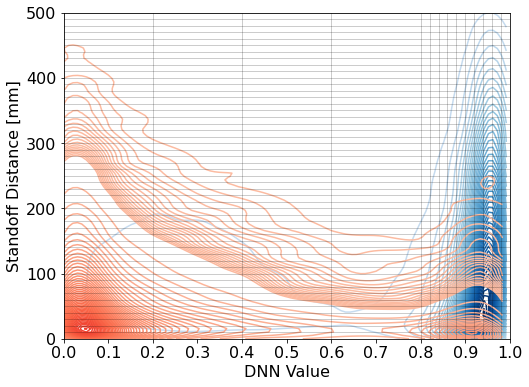

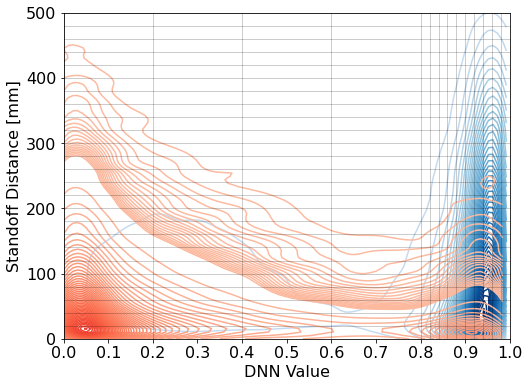

In [19]:
for key in binning.keys(): 
    print(key)
    
    fig, ax = plt.subplots(figsize=(8, 6))   
    plt.xlim(0,1)
    plt.ylim(0,500)
    plt.xlabel('DNN Value', fontsize=16)
    plt.ylabel('Standoff Distance [mm]', fontsize=16)
    plt.xticks(np.linspace(0,1,11), fontsize=16)
    plt.yticks(fontsize=16)

    levels=np.linspace(0,0.001,20)
    levels=np.append(levels[:-1], np.linspace(0.001,0.1,100))

    contour2 = ax.contour(X2,Y2,Z2, levels=50, extend='both', cmap=cmap_blue)
    contour1 = ax.contour(X,Y,Z, levels=levels, extend='both', cmap=cmap_red)


    for x in binning[key]['xbins']:
        ax.axvline(x, color='k', lw=1, alpha=0.2)
    for y in binning[key]['ybins']:
        ax.axhline(y, color='k', lw=1, alpha=0.2)

    plt.savefig('plots/contours/contour_th232_bb0n_dnn_standoff_%s.png' % key, dpi=300, bbox_inches='tight')

version 0
version 1
version 2
version 3
version 4
version 5
version 6


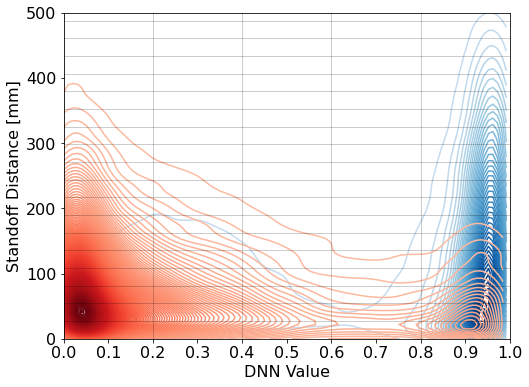

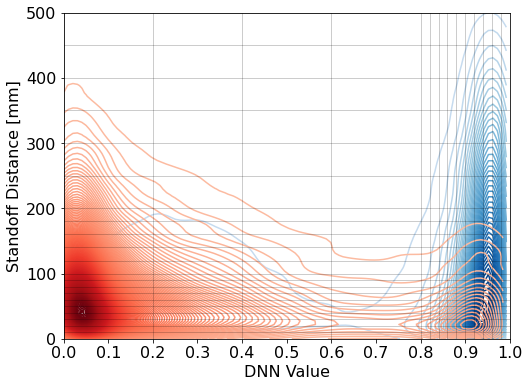

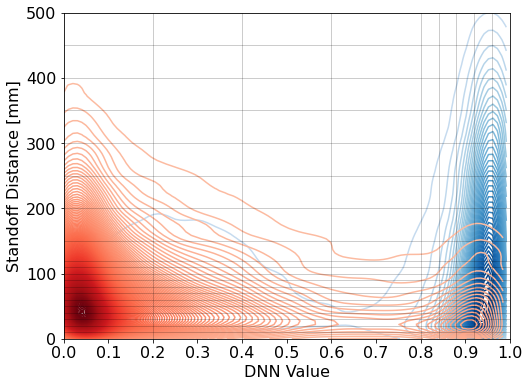

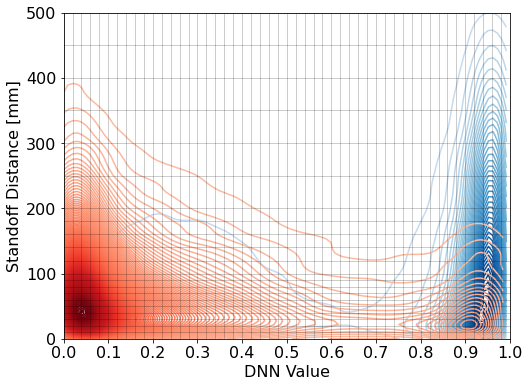

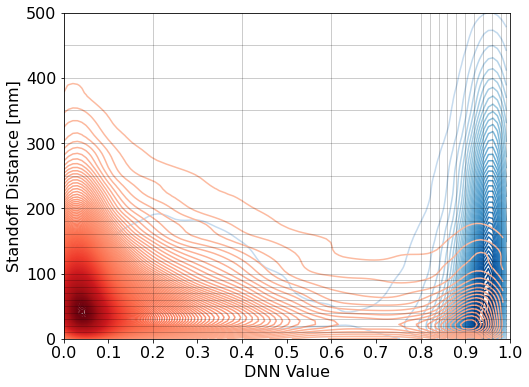

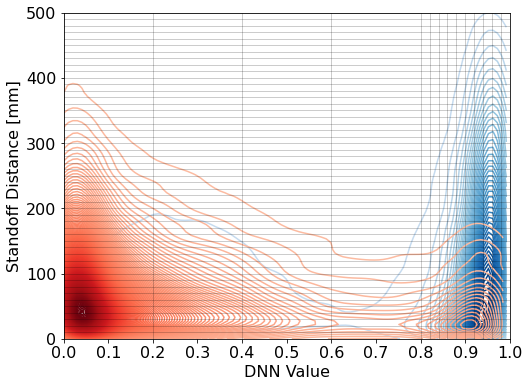

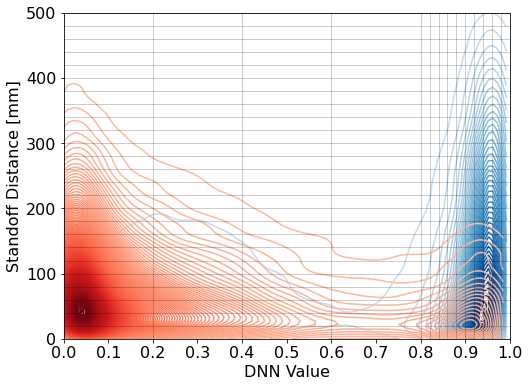

In [20]:
for key in binning.keys(): 
    print(key)

    fig, ax = plt.subplots(figsize=(8, 6))   
    plt.xlim(0,1)
    plt.ylim(0,500)
    plt.xlabel('DNN Value', fontsize=16)
    plt.ylabel('Standoff Distance [mm]', fontsize=16)
    plt.xticks(np.linspace(0,1,11), fontsize=16)
    plt.yticks(fontsize=16)

    contour2 = ax.contour(X2,Y2,Z2, levels=50, extend='both', cmap=cmap_blue)
    contour1 = ax.contour(X3,Y3,Z3, levels=150, extend='both', cmap=cmap_red)

    for x in binning[key]['xbins']:
        ax.axvline(x, color='k', lw=1, alpha=0.2)
    for y in binning[key]['ybins']:
        ax.axhline(y, color='k', lw=1, alpha=0.2)

    plt.savefig('plots/contours/contour_u238_bb0n_dnn_standoff_%s.png' % key, dpi=300, bbox_inches='tight')

version 0
version 1
version 2
version 3
version 4
version 5
version 6


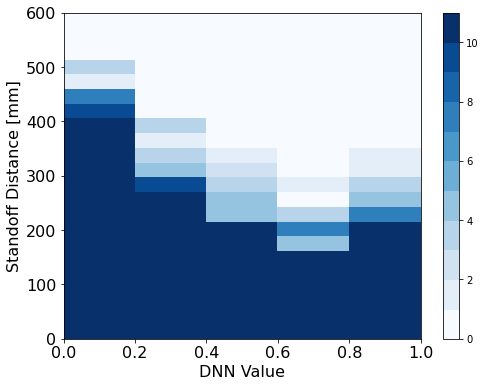

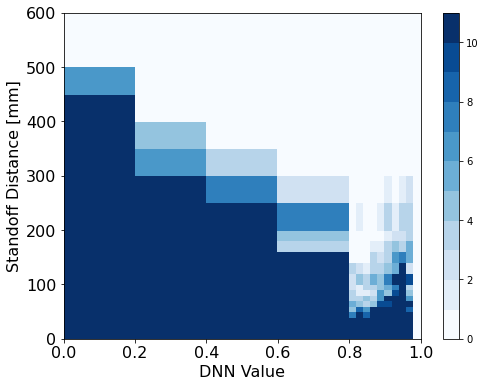

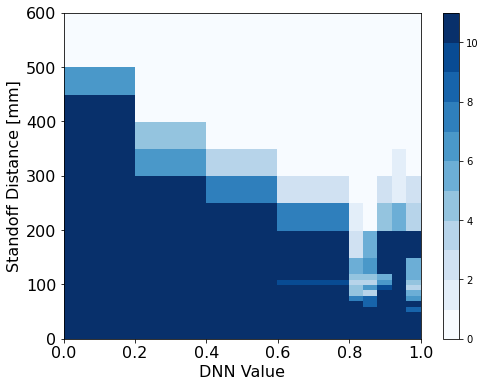

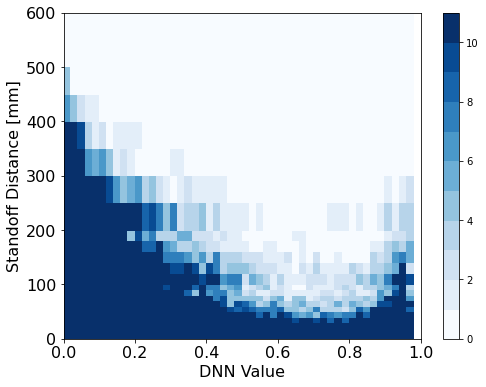

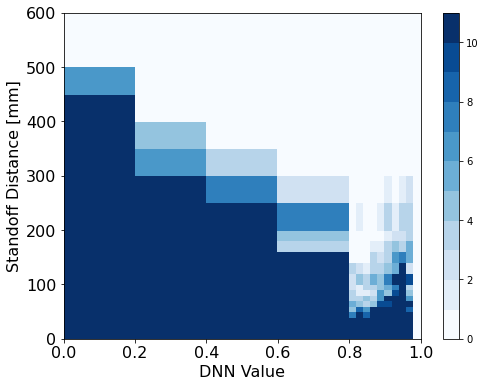

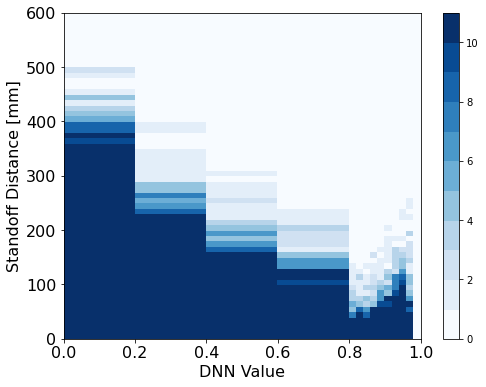

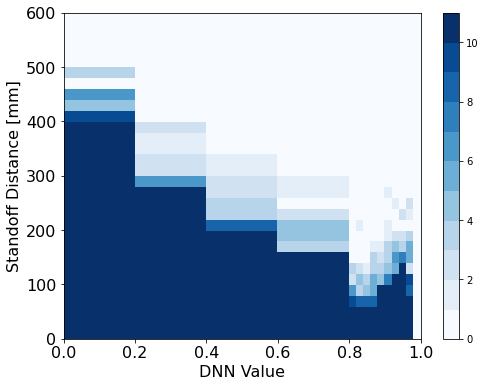

In [21]:
for key in binning.keys(): 
    print(key)

    fig, ax = plt.subplots(figsize=(8, 6))   
    H, xedges, yedges = np.histogram2d(m1,m2, bins=(binning[key]['xbins'],binning[key]['ybins']), weights=th232['weight'].array()[th232_cut])
    H = H.T
    XBins, YBins = np.meshgrid(xedges, yedges)

    # define the bins and normalize, see here: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/pcolormesh_levels.html
    cmap = plt.cm.Blues
    bounds = np.array([0,1,2,3,4,5,6,7,8,9,10,1000])
    norm = colors.BoundaryNorm(bounds, cmap.N)


    im = ax.pcolormesh(XBins, YBins, H, cmap=cmap, norm=norm)
    fig.colorbar(im, ax=ax)

    plt.xlim(0,1)
    plt.ylim(0,600)
    plt.xlabel('DNN Value', fontsize=16)
    plt.ylabel('Standoff Distance [mm]', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig('plots/counts/counts_per_bin_th232_bb0n_dnn_standoff_%s.png' % key, dpi=300, bbox_inches='tight')

version 0
version 1
version 2
version 3
version 4
version 5
version 6


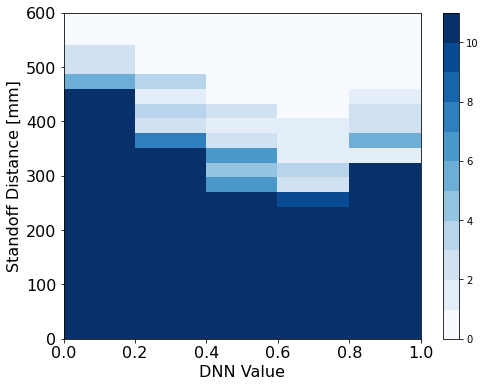

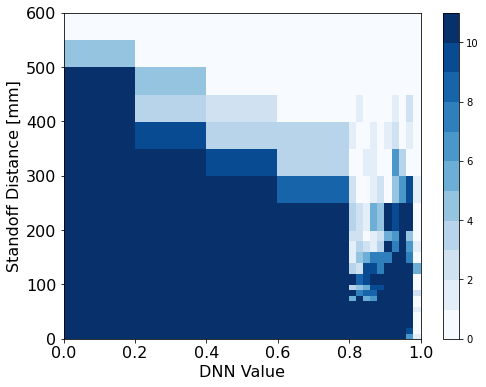

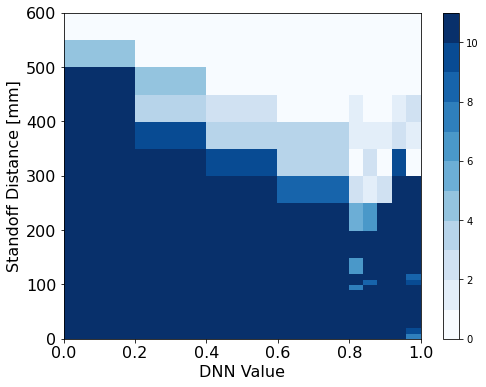

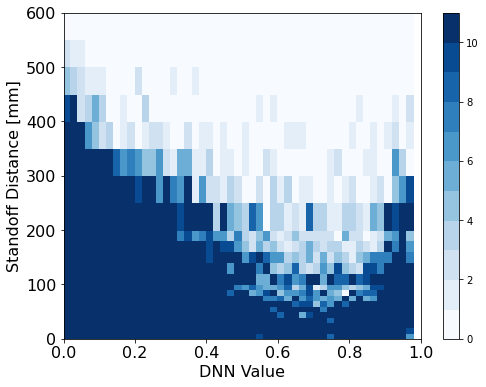

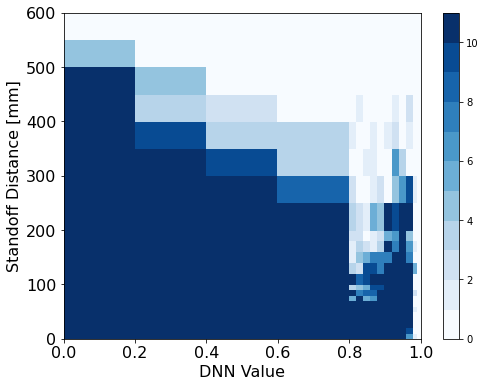

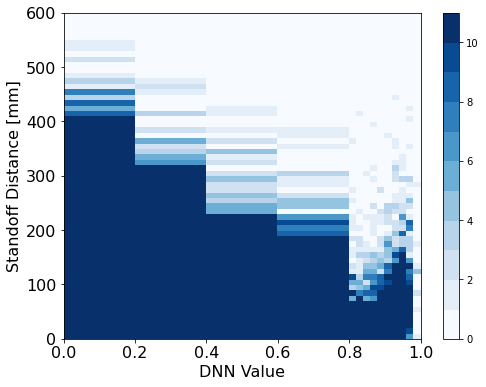

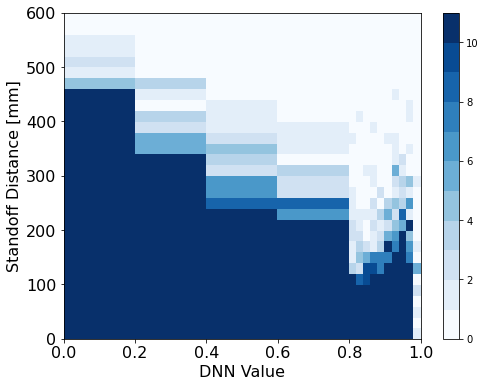

In [22]:
for key in binning.keys(): 
    print(key)

    fig, ax = plt.subplots(figsize=(8, 6))   
    H, xedges, yedges = np.histogram2d(m5,m6, bins=(binning[key]['xbins'],binning[key]['ybins']))
    H = H.T
    XBins, YBins = np.meshgrid(xedges, yedges)

    # define the bins and normalize, see here: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/pcolormesh_levels.html
    cmap = plt.cm.Blues
    bounds = np.array([0,1,2,3,4,5,6,7,8,9,10,1000])
    norm = colors.BoundaryNorm(bounds, cmap.N)


    im = ax.pcolormesh(XBins, YBins, H, cmap=cmap, norm=norm)
    fig.colorbar(im, ax=ax)

    plt.xlim(0,1)
    plt.ylim(0,600)
    plt.xlabel('DNN Value', fontsize=16)
    plt.ylabel('Standoff Distance [mm]', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig('plots/counts/counts_per_bin_u238_bb0n_dnn_standoff_%s.png' % key, dpi=300, bbox_inches='tight')